# Imports and Functions

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt
from scipy.stats import ttest_rel
import pandas as pd

In [3]:
def create_raincloud_plot(data, col1, col2, ax, p_value=0):
    """
    Create a paired raincloud plot for two columns of a dataframe.
    
    Parameters:
    - data: the dataframe containing the data
    - col1, col2: the names of the columns to be compared
    - ax: the matplotlib axis on which to plot
    """
    
    # Combine the data for the two columns
    combined_data = pd.concat([data[col1], data[col2]])
    labels = [col1] * len(data[col1]) + [col2] * len(data[col2])
    df = pd.DataFrame({ 'Category': labels, 'Value': combined_data})
    
    # Create the raincloud plot
    pt.RainCloud(x='Category', y='Value', data=df, width_viol=0.6, width_box=0.1, orient='v', palette="Set2", ax=ax, point_size=6)
    
    ax.axhline(0.5, color='#ed7a6b', linestyle='--')
    ax.set_ylabel("Classifier Accuracies")
    ax.set_xlabel("Classifier")

    # Calculate p-value for paired t-test
    t_stat, p_value = ttest_rel(data[col1], data[col2])

    # Format and display the p-value on the plot in the top right corner
    p_value_str = '{:.4f}'.format(p_value)
    ax.text(1, 1.02, f'p-value = {p_value_str}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color="#ff8b42")

In [4]:
def create_3_raincloud_plot(data, ax, orientation="h"):
    """
    Create raincloud plots for 3 columns of a dataframe. (Used for comparing the BENDR approaches)
    
    Parameters:
    - data: the dataframe containing the data
    - ax: the matplotlib axis on which to plot
    """
    # Define the columns
    columns = ["NN_SVC RBF", "PN_SVC RBF", "N_SVC RBF"]
    
    # Combine the data for the columns
    combined_data = pd.concat([data[col] for col in columns])
    labels = []
    for col in columns:
        labels.extend([col] * len(data[col]))
    df = pd.DataFrame({'Category': labels, 'Value': combined_data})

    # Set custom palette colors for TFA and BENDR
    palette = {'#ff5b42',"#ff7442","#ff8b42"}
    
    # Create the raincloud plot
    pt.RainCloud(x='Category', y='Value', data=df, width_viol=0.6, width_box=0.1, orient=orientation, palette=palette, ax=ax, point_size=6)
    
    if orientation == "h":
        ax.axvline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_ylabel("Classifier")
        ax.set_xlabel("Classifier Accuracies")
    else:
        ax.axhline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_xlabel("Classifier")
        ax.set_ylabel("Classifier Accuracies")
    ax.set_title("TFA vs BENDR")

In [5]:
def create_6_raincloud_plot(data, ax, orientation="h"):
    """
    Create raincloud plots for 6 columns of a dataframe. (Used for comparing the BENDR approaches)
    
    Parameters:
    - data: the dataframe containing the data
    - ax: the matplotlib axis on which to plot
    """
    # Define the columns
    columns = ["NN_LDA", "PN_LDA", "N_LDA", "NN_SVC RBF", "PN_SVC RBF", "N_SVC RBF"]
    
    # Combine the data for the columns
    combined_data = pd.concat([data[col] for col in columns])
    labels = []
    for col in columns:
        labels.extend([col] * len(data[col]))
    df = pd.DataFrame({'Category': labels, 'Value': combined_data})

    # Set custom palette colors for TFA and BENDR
    palette = {'#ff5b42',"#ff7442","#ff8b42",'#ff5b42',"#ff7442","#ff8b42"}
    
    # Create the raincloud plot
    pt.RainCloud(x='Category', y='Value', data=df, width_viol=0.6, width_box=0.1, orient=orientation, palette=palette, ax=ax, point_size=6)
    
    if orientation == "h":
        ax.axvline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_ylabel("Classifier")
        ax.set_xlabel("Classifier Accuracies")
    else:
        ax.axhline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_xlabel("Classifier")
        ax.set_ylabel("Classifier Accuracies")
    ax.set_title("TFA vs BENDR")

In [6]:
def create_4_raincloud_plot(data, ax, orientation="h"):
    """
    Create raincloud plots for 4 columns of a dataframe.
    
    Parameters:
    - data: the dataframe containing the data
    - ax: the matplotlib axis on which to plot
    """
    # Define the columns
    columns = ["TFA_LDA", "TFA_SVC RBF", "BENDR_LDA", "BENDR_SVC RBF"]
    
    # Combine the data for the columns
    combined_data = pd.concat([data[col] for col in columns])
    labels = []
    for col in columns:
        labels.extend([col] * len(data[col]))
    df = pd.DataFrame({'Category': labels, 'Value': combined_data})

    # Set custom palette colors for TFA and BENDR
    palette = {}
    for col in columns:
        if 'TFA' in col:
            palette[col] = '#56e893'
        else:  # 'BENDR' in col
            palette[col] = '#ff8b42'
    
    # Create the raincloud plot
    pt.RainCloud(x='Category', y='Value', data=df, width_viol=0.6, width_box=0.1, orient=orientation, palette=palette, ax=ax, point_size=6)
    
    if orientation == "h":
        ax.axvline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_ylabel("Classifier")
        ax.set_xlabel("Classifier Accuracies")
    else:
        ax.axhline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_xlabel("Classifier")
        ax.set_ylabel("Classifier Accuracies")
    ax.set_title("TFA vs BENDR")

In [7]:
def create_multi_raincloud_plot(data, ax, orientation="h"):
    """
    Create raincloud plots for 8 columns of a dataframe.
    
    Parameters:
    - data: the dataframe containing the data
    - ax: the matplotlib axis on which to plot
    """
    # Define the columns
    columns = ["TFA_LDA", "TFA_SVC RBF", "TFA_SVC Linear", "TFA_Logistic Regression",
               "BENDR_LDA", "BENDR_SVC RBF", "BENDR_SVC Linear", "BENDR_Logistic Regression"]
    
    # Combine the data for the columns
    combined_data = pd.concat([data[col] for col in columns])
    labels = []
    for col in columns:
        labels.extend([col] * len(data[col]))
    df = pd.DataFrame({'Category': labels, 'Value': combined_data})

    # Set custom palette colors for TFA and BENDR
    palette = {}
    for col in columns:
        if 'TFA' in col:
            palette[col] = '#56e893'
        else:  # 'BENDR' in col
            palette[col] = '#ff8b42'
    
    # Create the raincloud plot
    pt.RainCloud(x='Category', y='Value', data=df, width_viol=0.6, width_box=0.1, orient=orientation, palette=palette, ax=ax, point_size=6)
    
    if orientation == "h":
        ax.axvline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_ylabel("Classifier")
        ax.set_xlabel("Classifier Accuracies")
    else:
        ax.axhline(0.5, color='#ed7a6b', linestyle='--')
        ax.set_xlabel("Classifier")
        ax.set_ylabel("Classifier Accuracies")
    ax.set_title("TFA vs BENDR")

def remove_outliers(data, factor=1.5):
    """
    Remove outliers from a dataframe using the IQR method.

    Parameters:
    - data: a DataFrame containing the data
    - factor: the factor used to determine outliers; defaults to 1.5

    Returns: a DataFrame with outliers removed
    """
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        data = data[~((data[col] < (Q1 - factor * IQR)) | (data[col] > (Q3 + factor * IQR)))]
    return data

In [8]:
# Load the data from the spreadsheet
data = pd.read_excel("stats_experiment.xlsx")
data_artificial = pd.read_excel("stats_artificial.xlsx")
data_BENDR = pd.read_excel("stats_experiment_BENDR.xlsx")
# Display the first few rows of the data for examination
data.head()


,Fold,TFA_LDA,TFA_SVC RBF,TFA_SVC Linear,TFA_Logistic Regression,BENDR_LDA,BENDR_SVC RBF,BENDR_SVC Linear,BENDR_Logistic Regression
0,1,0.6422,0.7294,0.4312,0.4312,0.5780,0.5413,0.5596,0.5367
1,2,0.5640,0.6080,0.4920,0.4920,0.5040,0.5360,0.5480,0.5400
2,3,0.5936,0.5458,0.4980,0.4980,0.4980,0.5259,0.5299,0.5020
3,4,0.5325,0.5325,0.5152,0.5152,0.5152,0.5411,0.5281,0.5325
4,5,0.6213,0.6213,0.3787,0.3787,0.5385,0.5680,0.5385,0.5503


In [9]:
data_artificial.head()

,Fold,TFA_LDA,TFA_SVC RBF,TFA_SVC Linear,TFA_Logistic Regression,BENDR_LDA,BENDR_SVC RBF,BENDR_SVC Linear,BENDR_Logistic Regression
0,1,0.8716,0.9174,0.4312,0.4312,0.8394,0.8303,0.8440,0.6376
1,2,0.6080,0.6080,0.4920,0.4920,0.7880,0.7440,0.8000,0.5560
2,3,0.5777,0.5737,0.4980,0.4980,0.9721,0.8964,0.9402,0.5418
3,4,0.5974,0.8788,0.5152,0.5152,0.9177,0.8831,0.8918,0.6190
4,5,0.5799,0.6036,0.3787,0.3787,0.7811,0.7041,0.7515,0.5385


In [10]:
data_BENDR.head()

,Fold,NN_LDA,NN_SVC RBF,NN_SVC Linear,NN_Logistic Regression,PN_LDA,PN_SVC RBF,PN_SVC Linear,PN_Logistic Regression,N_LDA,N_SVC RBF,N_SVC Linear,N_Logistic Regression
0,1,0.5780,0.5413,0.5596,0.5367,0.5046,0.5505,0.5596,0.5596,0.4587,0.4771,0.4771,0.5000
1,2,0.5040,0.5360,0.5480,0.5400,0.4720,0.5400,0.4320,0.4840,0.5400,0.5440,0.5440,0.5640
2,3,0.4980,0.5259,0.5299,0.5020,0.5618,0.5339,0.5657,0.5618,0.4582,0.5139,0.5139,0.4741
3,4,0.5152,0.5411,0.5281,0.5325,0.5498,0.4848,0.5238,0.5108,0.4545,0.4632,0.4632,0.5108
4,5,0.5385,0.5680,0.5385,0.5503,0.5621,0.5740,0.6036,0.5799,0.4911,0.5266,0.5266,0.5266


# 🧪Experiment Data

## LDA

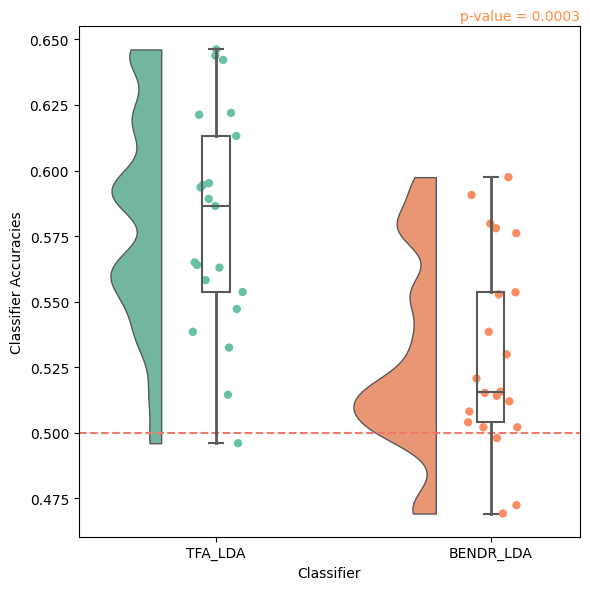

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data, 'TFA_LDA', 'BENDR_LDA', ax)
plt.tight_layout()
plt.show()


## SVC RBF Kernel

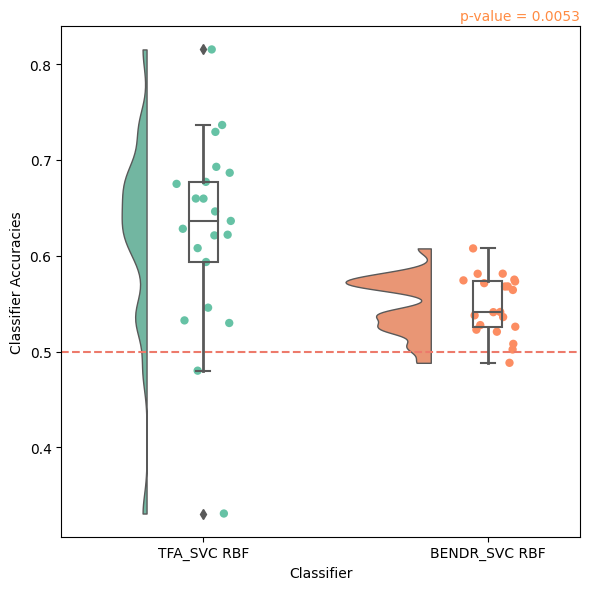

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data, 'TFA_SVC RBF', 'BENDR_SVC RBF', ax)
plt.tight_layout()
plt.show()

## SVC Linear Kernel

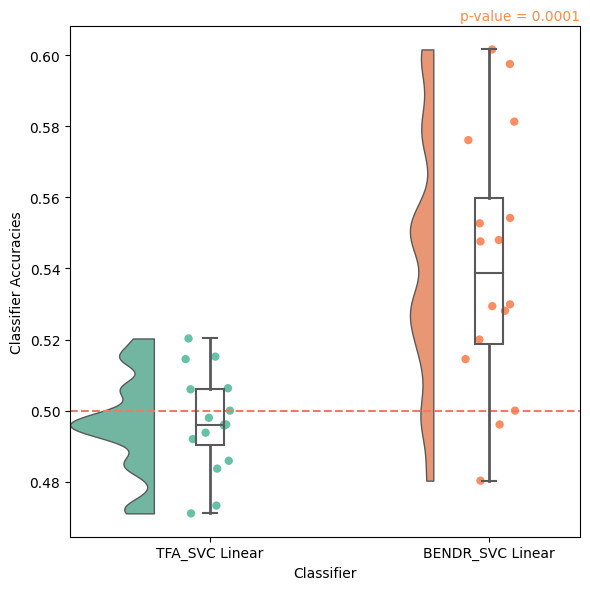

In [13]:
data_no = remove_outliers(data)
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data_no, 'TFA_SVC Linear', 'BENDR_SVC Linear', ax)
plt.tight_layout()
plt.show()

## Logistic Regression

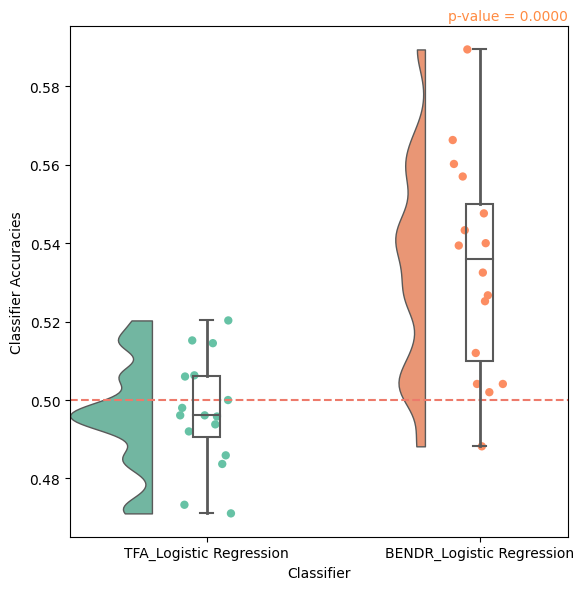

In [14]:
data_no = remove_outliers(data)
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data_no, 'TFA_Logistic Regression', 'BENDR_Logistic Regression', ax)
plt.tight_layout()
plt.show()

## All in one

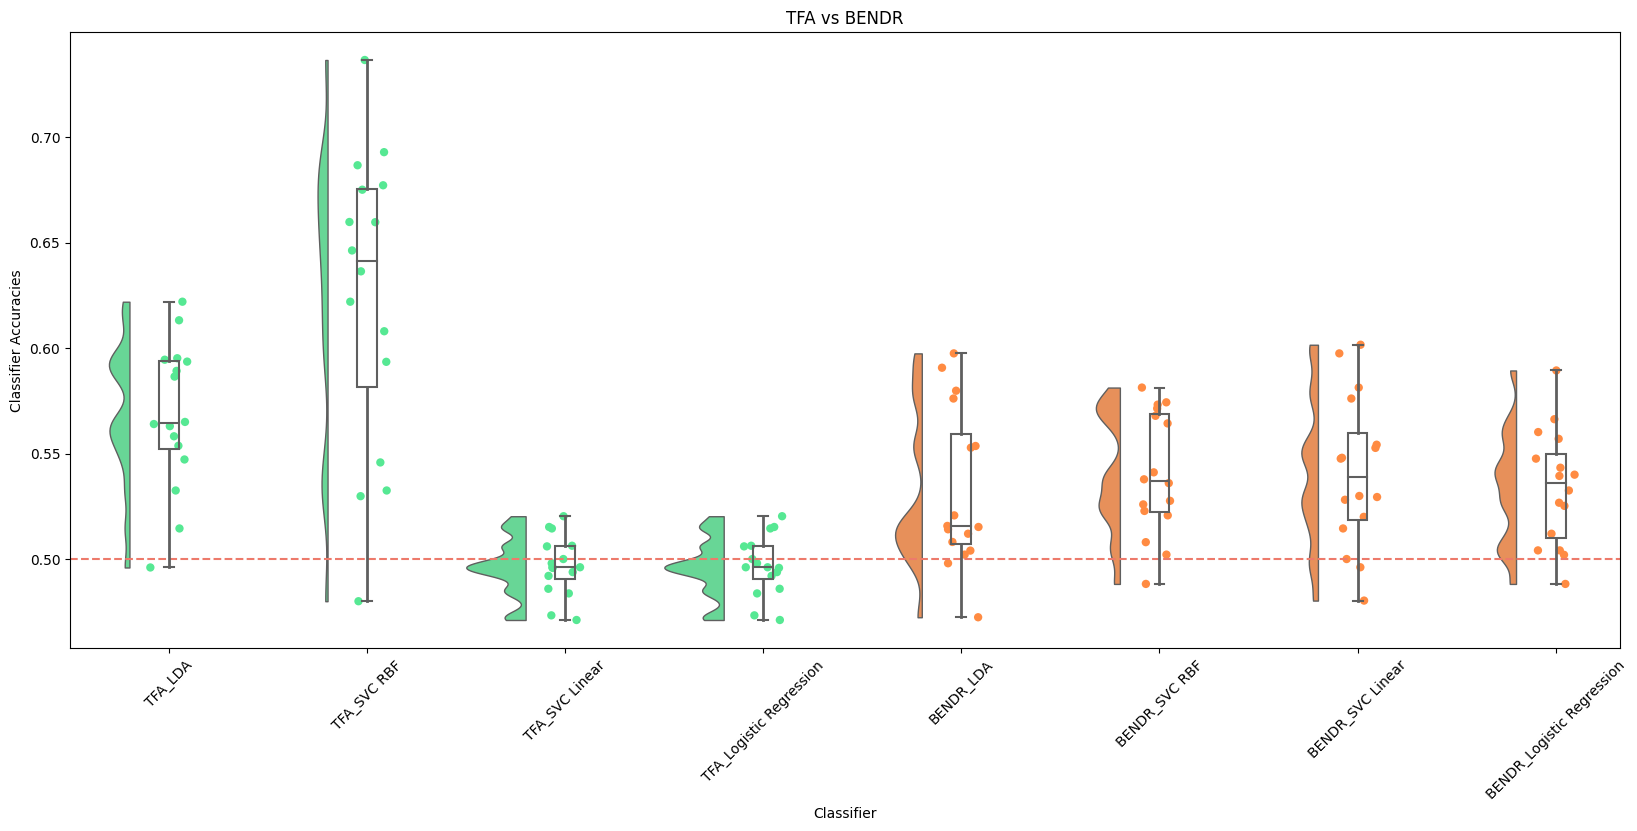

In [15]:
data_no = remove_outliers(data)
fig, ax = plt.subplots(figsize=(20, 8))
create_multi_raincloud_plot(data_no, ax, orientation="v")
plt.xticks(rotation=45)
plt.show()

# 🤖Artificial Data

## LDA

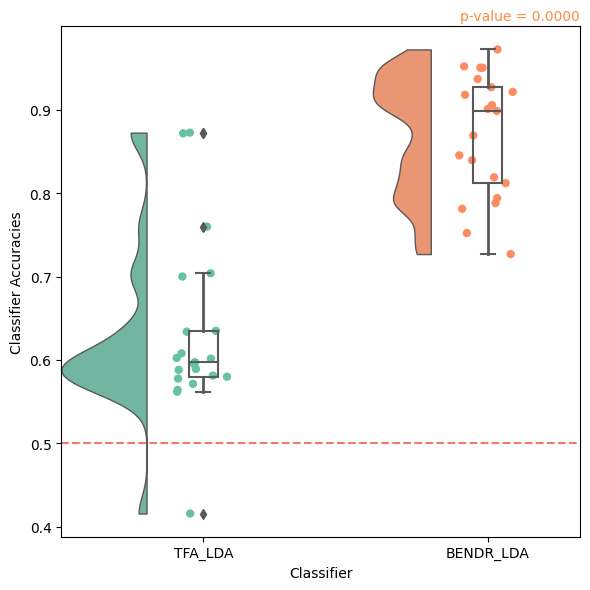

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data_artificial, 'TFA_LDA', 'BENDR_LDA', ax)
plt.tight_layout()
plt.show()


## SVC RBF kernel

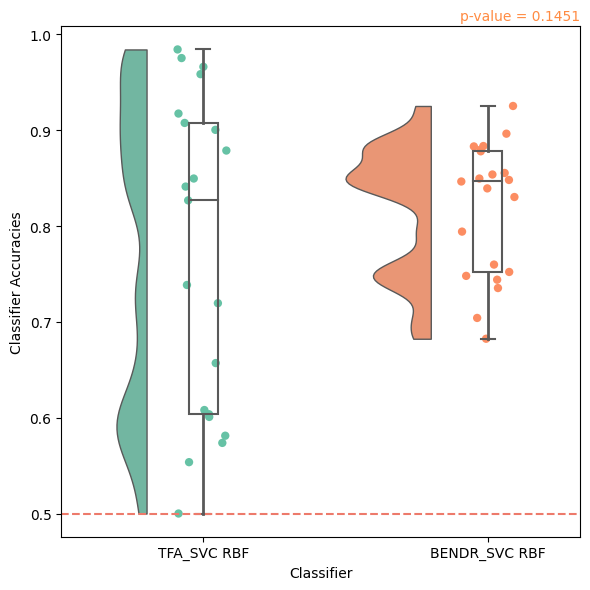

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data_artificial, 'TFA_SVC RBF', 'BENDR_SVC RBF', ax)
plt.tight_layout()
plt.show()

## SVC RBF kernel

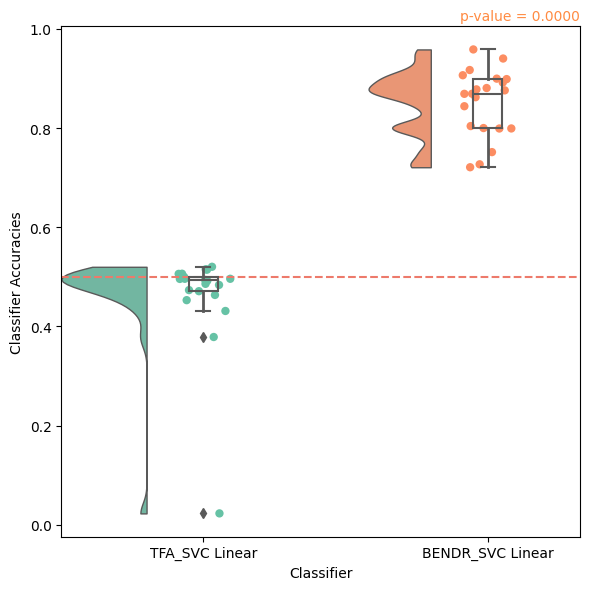

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data_artificial, 'TFA_SVC Linear', 'BENDR_SVC Linear', ax)
plt.tight_layout()
plt.show()

## Logistic Regression

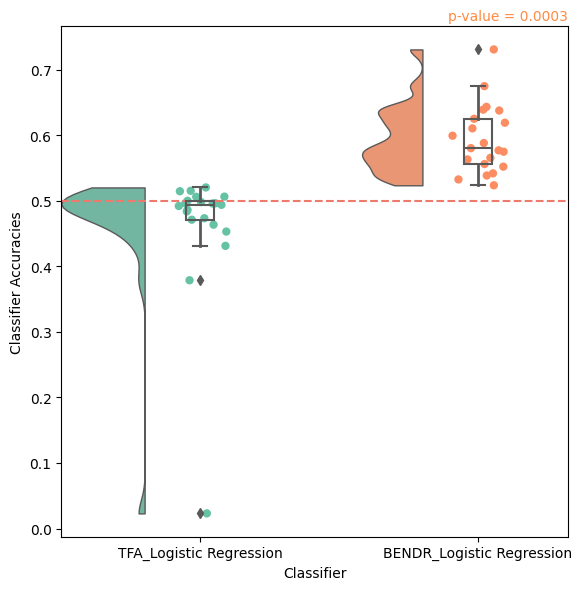

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data_artificial, 'TFA_Logistic Regression', 'BENDR_Logistic Regression', ax)
plt.tight_layout()
plt.show()

## All in one

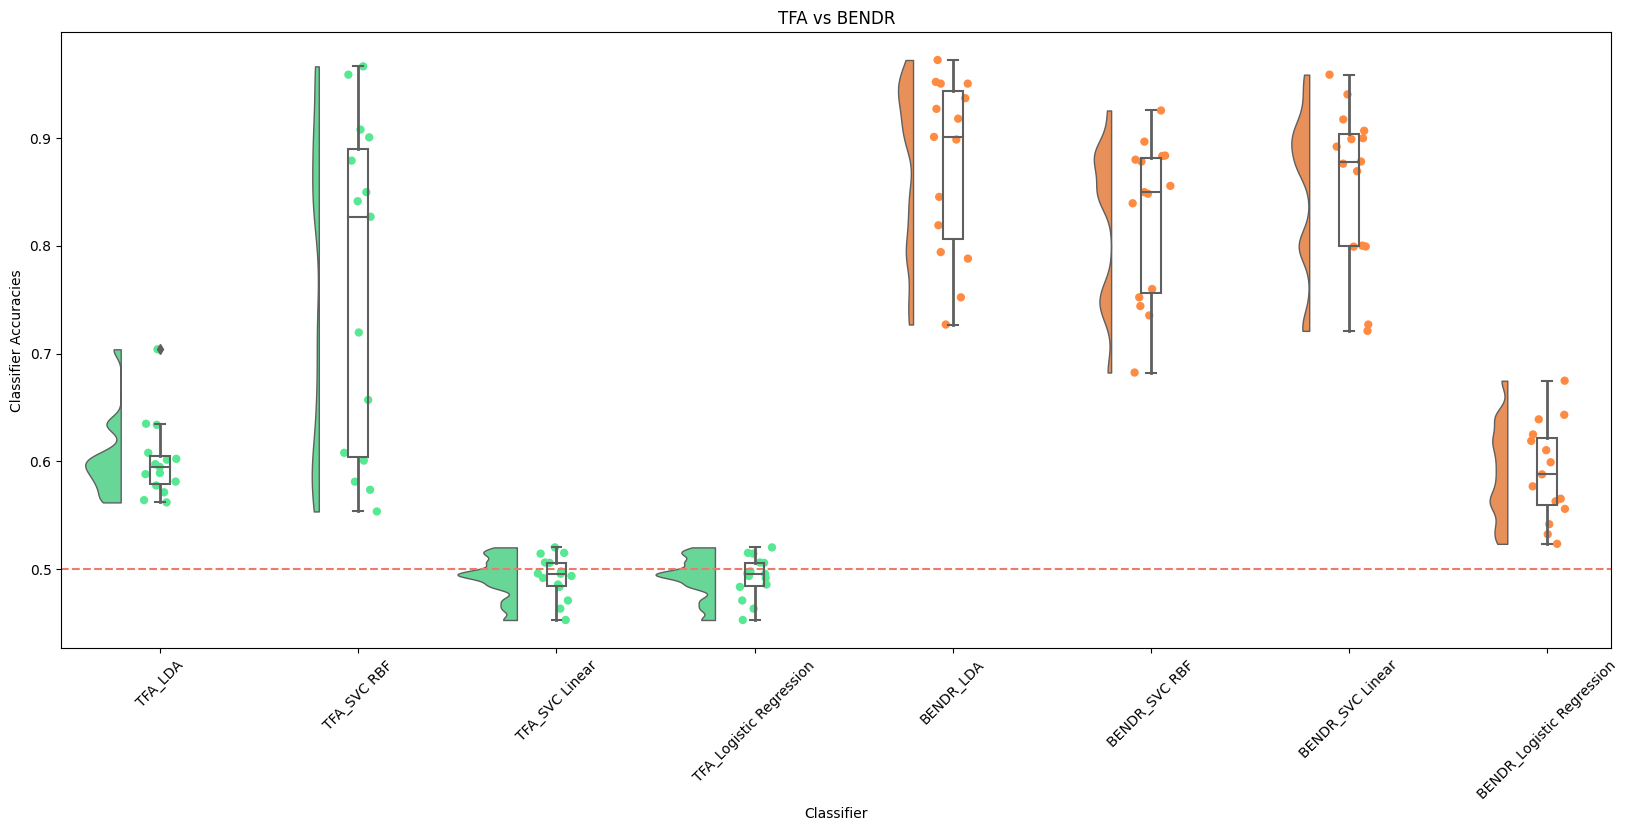

In [20]:
data_artificial_no = remove_outliers(data_artificial)
fig, ax = plt.subplots(figsize=(20, 8))
create_multi_raincloud_plot(data_artificial_no, ax, orientation="v")
plt.xticks(rotation=45)
plt.show()

# ⭕Other Comparisons

## Best of Experiemntal Data Classifier Results
- SVC RBF for both TFA and BENDR

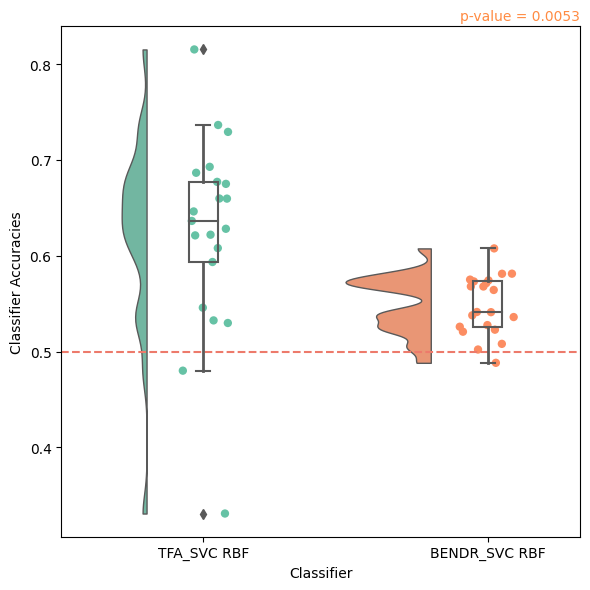

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data, 'TFA_SVC RBF', 'BENDR_SVC RBF', ax)
plt.tight_layout()
plt.show()

## Best of Artififcial Data Classifier Results
- SVC RBF for TFA
- LDA for BENDR

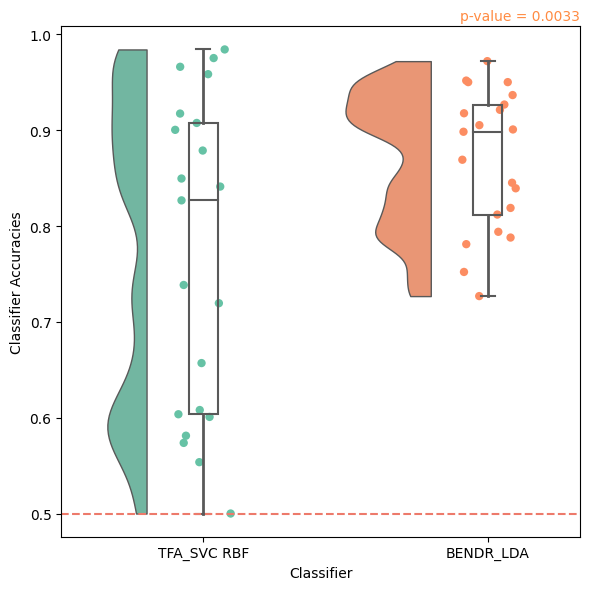

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
create_raincloud_plot(data_artificial, 'TFA_SVC RBF', 'BENDR_LDA', ax)
plt.tight_layout()
plt.show()

## 4 Classifiers for Experiment Data

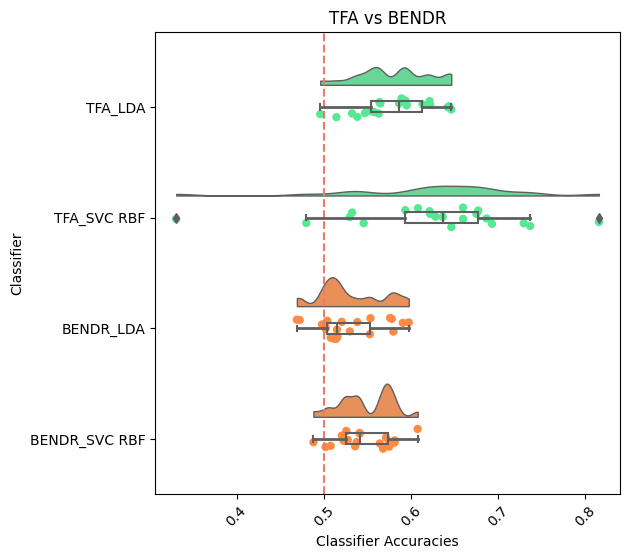

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
create_4_raincloud_plot(data, ax)
plt.xticks(rotation=45)
plt.show()

## 4 Classifiers for Artificial Data

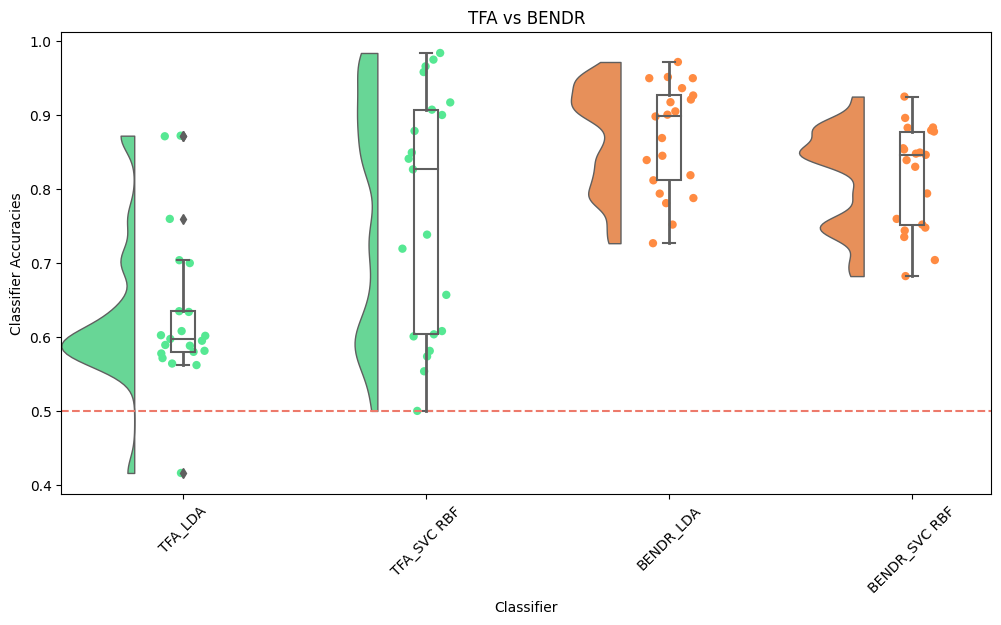

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
create_4_raincloud_plot(data_artificial, ax, orientation="v")
plt.xticks(rotation=45)
plt.show()

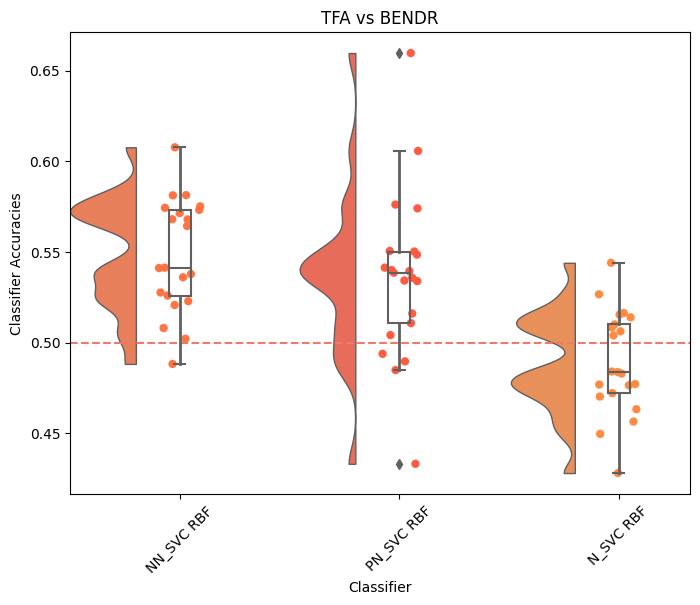

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
create_3_raincloud_plot(data_BENDR, ax, orientation="v")
plt.xticks(rotation=45)
plt.show()

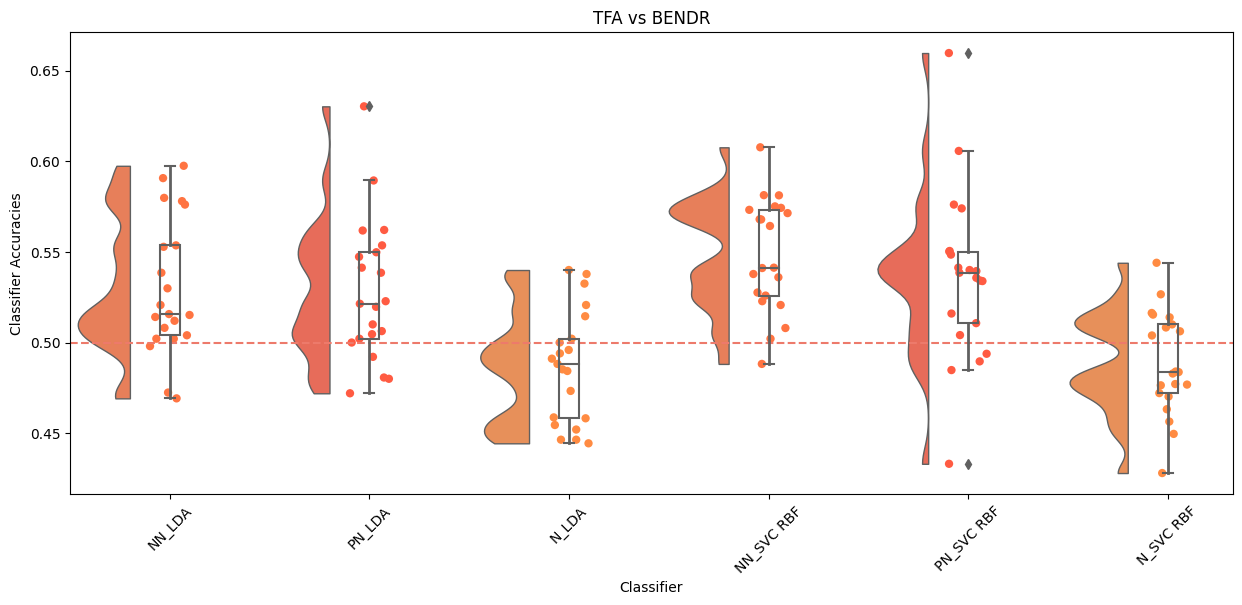

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
create_6_raincloud_plot(data_BENDR, ax, orientation="v")
plt.xticks(rotation=45)
plt.show()